# Лабораторная работа 3.2. Домашнее задание

### Задание №1

Создайте два массива: в первом должны быть четные числа от 2 до 12 включительно, а в другом числа 7, 11, 15, 18, 23, 29.

$1.$ Сложите массивы и возведите элементы получившегося массива в квадрат:

In [1]:
import numpy as np

In [2]:
a = np.arange(2, 13, 2)
b = np.array([7, 11, 15, 18, 23, 29])
print(a)
print(b)

[ 2  4  6  8 10 12]
[ 7 11 15 18 23 29]


$2.$ Выведите все элементы из первого массива, индексы которых соответствуют индексам тех элементов второго массива, которые больше 12 и дают остаток 3 при делении на 5.

In [3]:
loc = np.logical_and(b > 12, b % 5 == 3)
a[loc]

array([ 8, 10])

*3.* Проверьте условие "Элементы первого массива делятся на 4, элементы второго массива меньше 14". (Подсказка: в результате должен получиться массив с True и False)

In [4]:
log1 = a % 4 == 0
log2 = b < 14
print(log1 + log2)

[ True  True False  True False  True]


### Задание №2

* Найдите интересный для вас датасет. Например, можно выбрать датасет тут. http://data.un.org/Explorer.aspx (выбираете датасет, жмете на view data, потом download, выбирайте csv формат)
* Рассчитайте подходящие описательные статистики для признаков объектов в выбранном датасете
* Проанализируйте и прокомментируйте содержательно получившиеся результаты
* Все комментарии оформляйте строго в ячейках формата markdown
    

Ищем зависимость числа рождения от уровня грамотности
Число рождения - зависимая y
Уровень грамотности - независимая x

In [5]:
import csv
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Данные формата Страна, Год, детей рождено, уровень грамотности
with open('Годовое число рождений.csv', 'r', newline='') as csvfile:
    data = csv.reader(csvfile, delimiter=',')
    birth = [["Country", "Year", "Value"]]
    for row in data:
        if row[5].isdigit():
            birth.append([row[1], int(row[5]), int(row[11])])
            
with open('Уровень грамотности взрослого населения.csv', 'r', newline='') as csvfile:
    data = csv.reader(csvfile, delimiter=',')
    literacy = [["Country", "First year", "Last year", "Value"]]
    for row in data:
        if row[11].isdigit():
            f_year, l_year = map(int, row[5].split('-'))
            literacy.append([row[1], f_year, l_year, int(row[11])])
            
data = [["Country", "Year", "Birth", "Literacy"]]
for row1 in birth:
    for row2 in literacy:
        if row1[0] == row2[0] and row1[1] >= row2[1] and row1[1] <= row2[2]:
            data.append([row1[0], int(row1[1]), int(row1[2]), int(row2[3])])
data = np.array(data)

In [7]:
birth = np.int_(np.array(data[1:, 2]))
literacy = np.int_(np.array(data[1:, 3]))
print(birth)
print(literacy)

[    41    712    803    693     47    184     23   3016    107    356
     15    264     32     47   2996      8     75    730    288    317
    716     10   5823    156    511    245  16364    910     28     73
    679     43    110     13    348   2912    216  28448  14399    298
   1886    126     26    193     16   2613     42     67     51    776
    117    473    394     59    266    205    100  27098   4331   1255
   1144    557     50    154    345   1560     50    131    140  10790
     24  28334     65     60    157    144     35    747    686    579
      5    728      4    118     16   2195  10017     65      8    620
    889    824     60    722    138    777   6458     50   4764     70
    208    158    591   2358    410     97     21     44    221   1689
    449      4      5    605    471    110    227     47     20   1052
  37402    499    373    137  32584     10     35    466    194    824
     22     44    195      3     20    179   1289    109   1545    494
     9

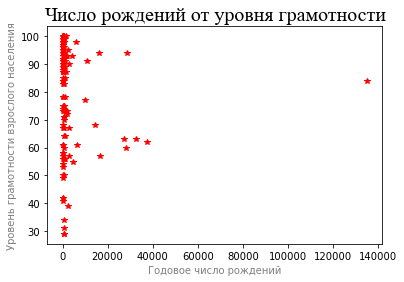

In [8]:
plt.title('Число рождений от уровня грамотности', fontsize=20, fontname='Times New Roman')
plt.xlabel('Годовое число рождений', color='gray')
plt.ylabel('Уровень грамотности взрослого населения',color='gray')
plt.plot(birth, literacy, color="r", marker="*", linestyle="none")

In [9]:
print(f"Среднее значение годового числа рождения: {np.mean(birth)}")
print(f"Среднее значение уровеня грамотности взрослого населения: {np.mean(literacy)}")
print(f"Среднее отклонение годового числа рождения: {np.std(birth)}")
print(f"Среднее отклонение уровеня грамотности взрослого населения: {np.std(literacy)}")
print(f"Дисперсия годового числа рождения: {np.var(birth)}")
print(f"Дисперсия уровеня грамотности взрослого населения: {np.var(literacy)}")
print(f"Коэффициент парной корреляции:\n {np.corrcoef(literacy, birth)}")

Среднее значение годового числа рождения: 2918.4039735099336
Среднее значение уровеня грамотности взрослого населения: 81.88079470198676
Среднее отклонение годового числа рождения: 12323.610323535137
Среднее отклонение уровеня грамотности взрослого населения: 18.465979871468555
Дисперсия годового числа рождения: 151871371.4063418
Дисперсия уровеня грамотности взрослого населения: 340.99241261348186
Коэффициент парной корреляции:
 [[ 1.         -0.07823878]
 [-0.07823878  1.        ]]


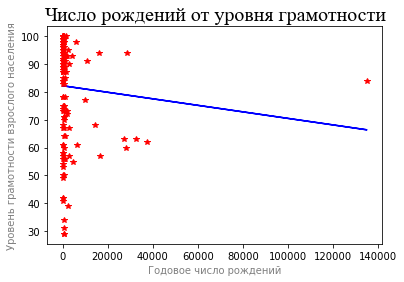

In [10]:
plt.title('Число рождений от уровня грамотности', fontsize=20, fontname='Times New Roman')
plt.xlabel('Годовое число рождений', color='gray')
plt.ylabel('Уровень грамотности взрослого населения',color='gray')
A = np.vstack([birth, np.ones(len(birth))]).T
m, c = np.linalg.lstsq(A, literacy, rcond=None)[0]
plt.plot(birth, m*birth + c, 'b')
plt.plot(birth, literacy, color="r", marker="*", linestyle="none")